In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

## Finding relationship in random data

#### Generate random data  
At the first step we will create 2 random set of numbers that don't depend on each other.  
Let's generate 1,000,000 observations drawn from the normal distribution with mean = 100 and standard deviation = 20 for each set.

In [2]:
# draw samples from normal distribution
a = stats.norm.rvs(loc=100, scale=20, size=1000000)
b = stats.norm.rvs(loc=100, scale=20, size=1000000)

# calculate Pearson correlation
cor = stats.pearsonr(x=a, y=b)[0]

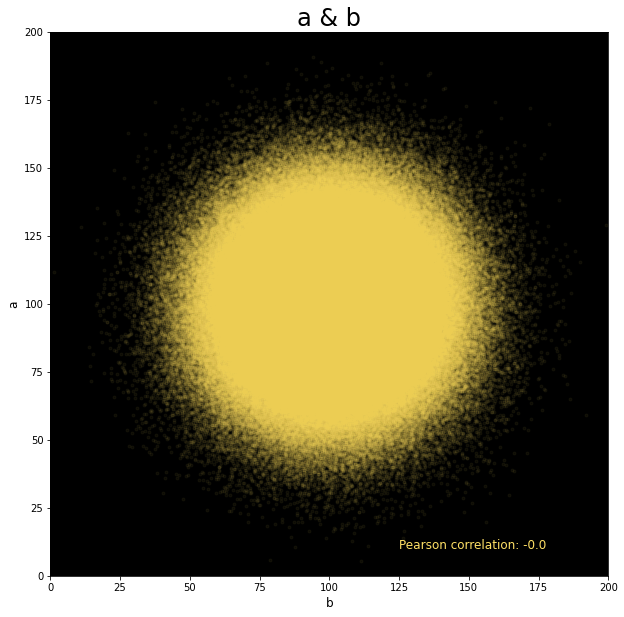

In [3]:
# plot the data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x=a, y=b, marker='.', color='#ffe066', alpha=0.05)
ax.text(s='Pearson correlation: {}'.format(round(cor, 3)), x=125, y=10, color='#ffe066', fontsize=12)
ax.set_facecolor('black')
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.xlabel('b', fontsize=12)
plt.ylabel('a', fontsize=12)
plt.title('a & b', fontsize=24)
plt.show();

Correlation between the data points is ~0.

#### Review data samples randomly drawn from the data  

Now let's randomly extract 5 observations and calculate correlation for it.

In [4]:
# generate random indexes
i = np.random.randint(low=0, high=99999, size=5)

# extract elements with generated indexes from the samples
a_i = a[i]
b_i = b[i]

# calculate correlation
cor = stats.pearsonr(x=a_i, y=b_i)[0]

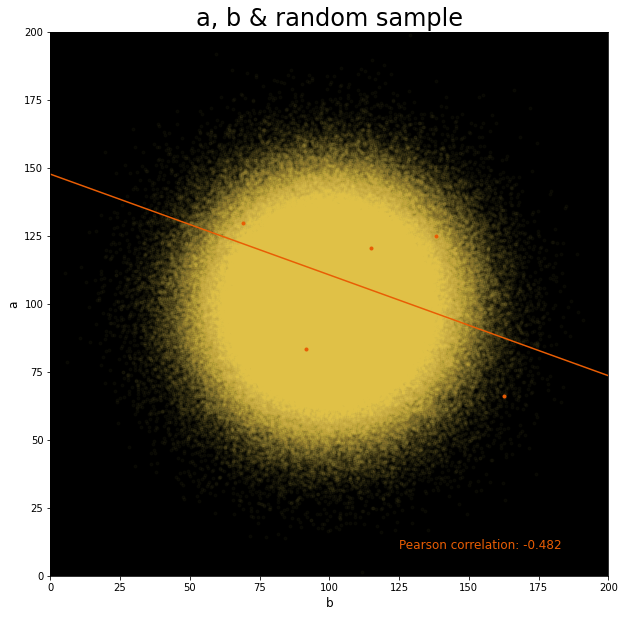

In [5]:
model = LinearRegression()
model.fit(np.reshape(b_i, (len(b_i), 1)), a_i)

b_new = np.linspace(0, 200, 100)
a_new = model.predict(b_new[:, np.newaxis])

# plot the data
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x=b, y=a, marker='.', color='#ffe066', alpha=0.03)
ax.scatter(x=b_i, y=a_i, marker='.', color='#e85d04')
ax.plot(b_new, a_new, color='#e85d04')
ax.text(s='Pearson correlation: {}'.format(round(cor, 3)), x=125, y=10, color='#e85d04', fontsize=12)
ax.set_facecolor('black')
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.xlabel('b', fontsize=12)
plt.ylabel('a', fontsize=12)
plt.title('a, b & random sample', fontsize=24)
plt.show();

The correlation between 5 randomly chosen data points is quite high relatively to the population correlation. Let's repeat same operation many times with different sample sizes (5, 10, 20, 50) and see what is the percentage of cases where correlation is less than certain treshold (-0.4, 0.4) (1).

In [6]:
iterations = 100000

sample_correlations = {
    5: np.array([]),
    10: np.array([]),
    20: np.array([]),
    50: np.array([])
}

sample_sizes = [5, 10, 20, 50]
low = 0
high = len(b) - 1

for size in sample_sizes:
    for k in range(iterations):
        i = np.random.randint(low=low, high=high, size=size)
        a_i = a[i]
        b_i = b[i]

        cor_i = stats.pearsonr(x=b_i, y=a_i)[0]

        sample_correlations[size] = np.append(sample_correlations[size], cor_i)

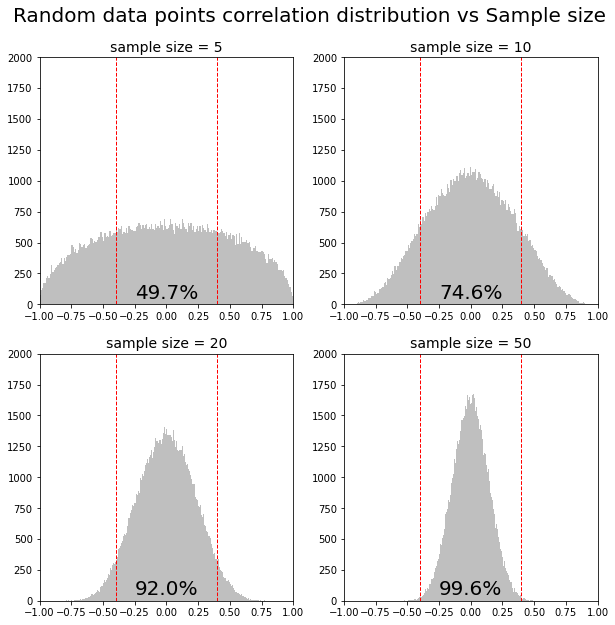

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for ax, size in zip(axs.flat, sample_sizes):
    ax.hist(sample_correlations[size], bins=200, color='grey', alpha=0.5)
    ax.set_title('sample size = {}'.format(size), fontsize=14)
    ax.axvline(-0.4, color='red', linestyle='--', linewidth=1)
    ax.axvline(0.4, color='red', linestyle='--', linewidth=1)
    
    # calculate share of samples with correlation between -0.399 and 0.399
    share = ( iterations - (np.sum(sample_correlations[size] <= -0.4) + np.sum(sample_correlations[size] >= 0.4)) ) / iterations
    
    # add share to the chart
    ax.text(
        s='{}%'.format(round(share*100, 1)), 
        x=0, y=50, 
        horizontalalignment='center', 
        color='black', 
        fontsize=20)
    
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 2000)

fig.suptitle(t='Random data points correlation distribution vs Sample size', y=0.95, fontsize=20);

Conclusion was obvious even before we performed the simulation, but now it's confirmed with the data: the fewer data points we have the lower our confidence in the result. From our data using only 5 data points leads to at least moderate correlation coefficient (1) in more than 50% of cases, when using 50 observations exseeds the treshold in only 0.4% of times.  

## Links  
1. "User's guide to correlation coefficient" (Turkish Journal of Emergency Medicine), Haldun Akoglu, Marmara University School of Medicine, Department of Emergency Medicine, Istanbul, Turkey. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/pdf/main.pdf  
  
2. Primer of Biostatistics, Seventh Edition, Stanton A. Glantz, PhD. 2012 by The McGraw-Hill Companies, Inc.
